# Regressionsanalyse: Projektarbeit Gruppe 4
Haim, Kakici, Roßmann  
Datensatz: Framingham

## Aufgabenstellung
Durchführung einer multivariaten Regression mit kategorialen Variablen
* Schritt 1) deskriptive Beschreibung des Datensatzes
* Schritt 2) Auswahl der Variablen für die Regression und inhaltliche Begründung der Auswahl
* Schritt 3) Durchführung der Regressionsanalyse
* Schritt 4) Evaluierung der Regression

Zusätzlich überlegen, ob eine logistische Regression möglich ist und mit welchen Variablen

## Deskriptive Beschreibung des Datensatzes
The Framingham Heart Study is one of the longest running health studies. It has followed original subjects, their children, and their grand children, looking for factors that affect cardiac health.

These data only include subjects whose cholesterol was measured in the first exam. Source: “Statistical Methods in Epidemiology” by H.A.Kahn and C.T.Sempos

_Systolic_ and _diastolic_ blood pressure make up the two numbers in a blood pressure reading (e.g., 120/80).
* Systolic blood pressure, or the top number, is the amount of pressure experienced by the arteries while the heart is beating.
* Diastolic blood pressure (the bottom number) is the amount of pressure in the arteries while the heart is resting in between heart beats.

|Variable   |Beschreibung   |
|-------------------|---------------------|
|Sex                |Geschlecht                     |
|age                |Alter                          |
|education          |Ausbildung von 1 bis 4         |
|currentSmoker      |Raucher 1 = ja; 0 = nein           |
|cigsPerDay         |Zigaretten pro Tag             |
|BPMeds             |Angabe, ob blutdrucksenkende Medikamente verwendet wurden |
|prevalentStroke    |Schlaganfall (1 = ja; 0 = nein) |
|prevalentHyp       |Bluthochdruck (1 = ja; 0 = nein) |
|diabetes           |Diabetes (1 = ja; 0 = nein)    |
|totChol            |Cholesterinwert |
|sysBP              |systolischer Bluthochdruck |
|diaBP              |diastolischer Bluthochdruck |
|BMI                |Body Mass index |
|heartRate          |Puls |
|glucose            |Glukose (1 = ja; 0 = nein) |
|tenYearCHD         |Zehn-Jahres-Risiko für koronare Herzkrankheiten (1 = ja, 0 = nein) |



In [ ]:
#Libraries

#install.packages("corrplot", repos='http://cran.us.r-project.org')
#install.packages("GGally")
library('GGally')
library(performance)

In [10]:
# Einlesen der Daten
data = read.csv("framingham.csv", stringsAsFactors=T)

In [11]:
str(data)

'data.frame':	4240 obs. of  16 variables:
 $ Sex            : Factor w/ 2 levels "female","male": 2 1 2 1 1 1 1 1 2 2 ...
 $ age            : int  39 46 48 61 46 43 63 45 52 43 ...
 $ education      : int  4 2 1 3 3 2 1 2 1 1 ...
 $ currentSmoker  : Factor w/ 2 levels "No","Yes": 1 1 2 2 2 1 1 2 1 2 ...
 $ cigsPerDay     : int  0 0 20 30 23 0 0 20 0 30 ...
 $ BPMeds         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ prevalentStroke: int  0 0 0 0 0 0 0 0 0 0 ...
 $ prevalentHyp   : int  0 0 0 1 0 1 0 0 1 1 ...
 $ diabetes       : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 1 1 1 1 ...
 $ totChol        : int  195 250 245 225 285 228 205 313 260 225 ...
 $ sysBP          : num  106 121 128 150 130 ...
 $ diaBP          : num  70 81 80 95 84 110 71 71 89 107 ...
 $ BMI            : num  27 28.7 25.3 28.6 23.1 ...
 $ heartRate      : int  80 95 75 65 85 77 60 79 76 93 ...
 $ glucose        : int  77 76 70 103 85 99 85 78 79 88 ...
 $ TenYearCHD     : int  0 0 0 1 0 0 1 0 0 0 ...


In [4]:
summary(data)

     Sex            age          education     currentSmoker   cigsPerDay    
 female:2420   Min.   :32.00   Min.   :1.000   No :2145      Min.   : 0.000  
 male  :1820   1st Qu.:42.00   1st Qu.:1.000   Yes:2095      1st Qu.: 0.000  
               Median :49.00   Median :2.000                 Median : 0.000  
               Mean   :49.58   Mean   :1.979                 Mean   : 9.006  
               3rd Qu.:56.00   3rd Qu.:3.000                 3rd Qu.:20.000  
               Max.   :70.00   Max.   :4.000                 Max.   :70.000  
                               NA's   :105                   NA's   :29      
     BPMeds        prevalentStroke     prevalentHyp    diabetes  
 Min.   :0.00000   Min.   :0.000000   Min.   :0.0000   No :4131  
 1st Qu.:0.00000   1st Qu.:0.000000   1st Qu.:0.0000   Yes: 109  
 Median :0.00000   Median :0.000000   Median :0.0000             
 Mean   :0.02962   Mean   :0.005896   Mean   :0.3106             
 3rd Qu.:0.00000   3rd Qu.:0.000000   3rd Qu.:

### NA-Werte
Wir sehen hier bereits, dass wir einige Variablen mit NA-Angaben haben, also die Personen die Fragen nicht beantwortet haben. Diese haben wir vor Berechnung der Korrelationen rausgenommen, um keine Fehlermeldung zu bekommen.<br>
Gleichzeitig nehmen wir auch alle kategorialen Variablen raus, da diese in der Korrelation keine Aussagekraft haben

In [14]:
# Reduzierung auf Datensatz ohne NA-Werte
data=na.omit(data)

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
age,1.00,-0.19,0.26,0.39,0.20,0.14,-0.01,0.12
cigsPerDay,-0.19,1.00,-0.03,-0.09,-0.06,-0.09,0.07,-0.06
totChol,0.26,-0.03,1.00,0.22,0.17,0.11,0.09,0.05
sysBP,0.39,-0.09,0.22,1.00,0.79,0.33,0.18,0.13
diaBP,0.20,-0.06,0.17,0.79,1.00,0.38,0.18,0.06
BMI,0.14,-0.09,0.11,0.33,0.38,1.00,0.07,0.09
heartRate,-0.01,0.07,0.09,0.18,0.18,0.07,1.00,0.10
glucose,0.12,-0.06,0.05,0.13,0.06,0.09,0.10,1.00


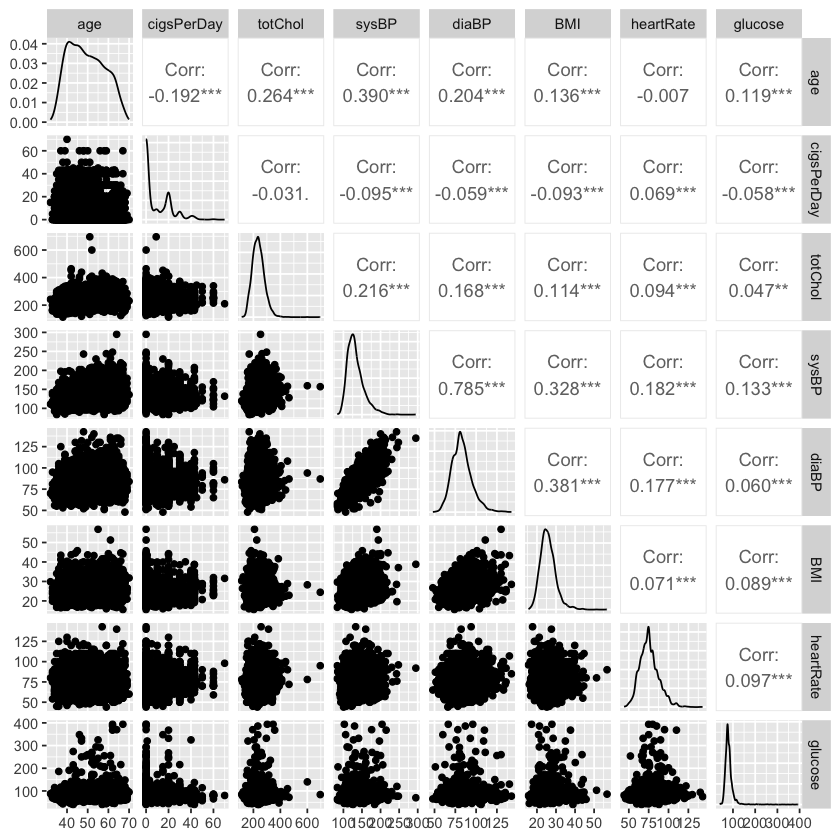

In [13]:
# Korrelationen
# vorher nehmen wir alle NA, nicht-numerischen & kategorialen Daten aus

corrData = na.omit(data[, c(2,5,10:15)])
round(cor(corrData),2)
ggpairs(corrData)

### Interpretation
Wir sehen hier bereits, dass wir einige Variablen mit NA-Angaben haben, also die Personen die Fragen nicht beantwortet haben. Diese haben wir vor Berechnung der Korrelationen rausgenommen, um keine Fehlermeldung zu bekommen.

Insgesamt sehen wir, dass die Variablen untereinander in Summe sehr niedrige Korrelationen haben, mit Ausnahme von `diaBP` und `sysBP`, was aber eigentlich selbstverständlich ist, da eine der beiden automatisch höher werden, wenn die andere höher wird. Sie sind voneinander abhängig, und somit nicht für das Modell geeignet.

__Variablen mit den stärksten Korrelationen, von denen wir denken, dass sie sich nicht untereinander beeinflussen:__
* `BMI` und `sysBP` mit 0.328
* `age` und `sysBP` mit 0.390
* `age` und `totChol` mit 0.264
* `totChol` und `sysBP` mit 0.216

## Regressionsanalyse

### Auswahl der Variablen
__abhängige Variable__: `totChol`  
__unabhängige Variablen__: `age`, `Sex`, `BMI`

### Begründung:
Wir möchten darstellen, dass die unabhängigen Variablen Einfluss auf die abhängige Variable haben. Die Annahme ist, dass mit steigendem `age` bzw `BMI` auch der `totChol` steigt. Der Einfluss von `Sex` ist noch nicht bekannt, wir könnten uns aber vorstellen, dass Männer eher betroffen sind, also dass `Sex: male` höheren Einfluss hat, als `Sex:female`.

### Erstellung des Modells

In [15]:
modell = lm(totChol ~ age + Sex + BMI, data = data)
summary(modell)


Call:
lm(formula = totChol ~ age + Sex + BMI, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-137.35  -28.66   -3.22   24.88  354.70 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 149.28516    5.68063  26.280  < 2e-16 ***
age           1.30803    0.08237  15.880  < 2e-16 ***
Sexmale      -6.28310    1.40965  -4.457 8.55e-06 ***
BMI           0.99039    0.17388   5.696 1.33e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 42.22 on 3654 degrees of freedom
Multiple R-squared:  0.08416,	Adjusted R-squared:  0.08341 
F-statistic: 111.9 on 3 and 3654 DF,  p-value: < 2.2e-16


### Interpretation der Ergebnisse
Abhängige Variable ist totChol, die unabhängigen Variablen sind `age`,`Sex` und `BMI`.

Sex wird logischerweise unterteilt in `Female` und `Male`, während `Male` im Output angezeigt, wird stellt der Intercept Wert `Female` dar. Unser $R^2$ ist 0.084 was einem prozentuellem Anteil von 8,4% entspricht. Das Modell erklärt somit 8.4% der Gesamtvarianz der unabhängigen Variable. Betrachtet man dazu den p-Wert, dieser entspricht: < 2.2e-16, stellt das einen Topwert dar. Was man von dem Bestimmtheitsmaß $R^2$ nicht behaupten kann.

Die einzelnen Variablen zeigen signifikante Werte `Pr(>|t|)`, alle sind <0.05, und leisten somit signifikanten Beitrag zur Erklärung der abhängigen Variable.

Die _Regressionsgleichung_ lautet

$$y=149.29+(1.31*age)-(6.28*Sexmale)+(0.99*BMI)$$

Die unabhängige Variable `Sexmale` hat einen klaren negativen Einfluss auf die abhängige Variable. Daraus kann man schließen, dass das Modell ohne diese Variable besser wäre.

### Prüfung der Voraussetzungen

Die Daten müssen bestimmte Voraussetzungen erfüllen, damit das Modell einer linearen Regression auch valide Ergebnisse liefert. 

#### Voraussetzungen für die abhängige Variable `totChol`

(1) _y_ muss metrisch skaliert sein = <span style="color:green">gegeben</span><br>
(2) Werte von _y_ müssen unabhängig voneinander sein. Prüfung mittels Streudiagramm = <span style="color:green">gegeben</span><br>

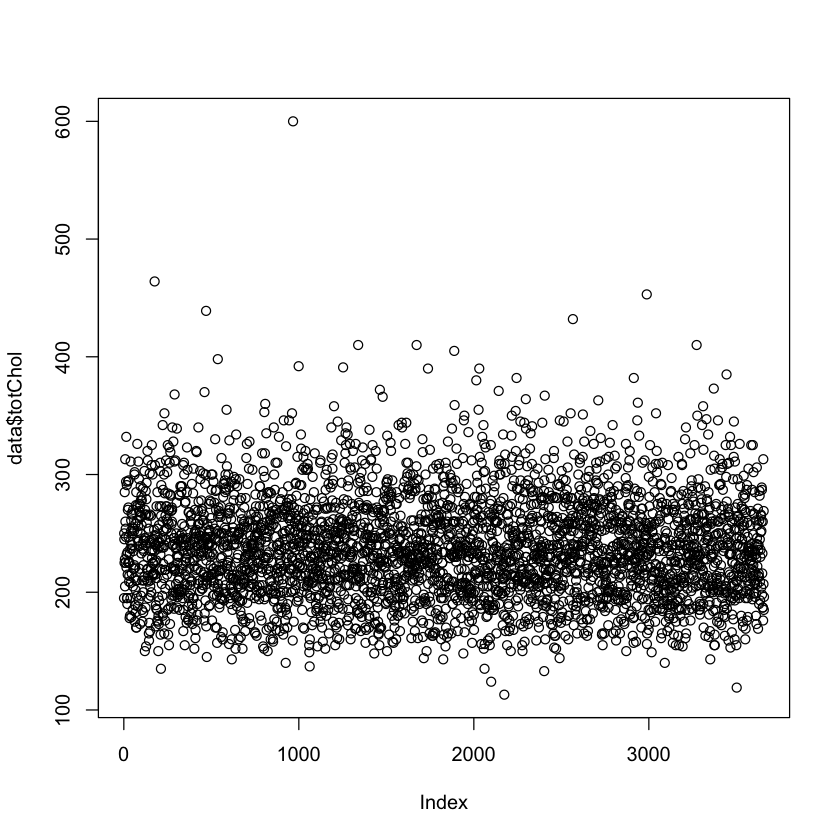

In [7]:
# ad 1 und 2
# Werte von y müssen unabhängig voneinander sein
plot(data$totChol)

(3) _y_ muss linear abhängig von den anderen unabhängigen Variablen sein. Prüfung mittels Streudiagramm = <span style="color:green">gegeben</span>

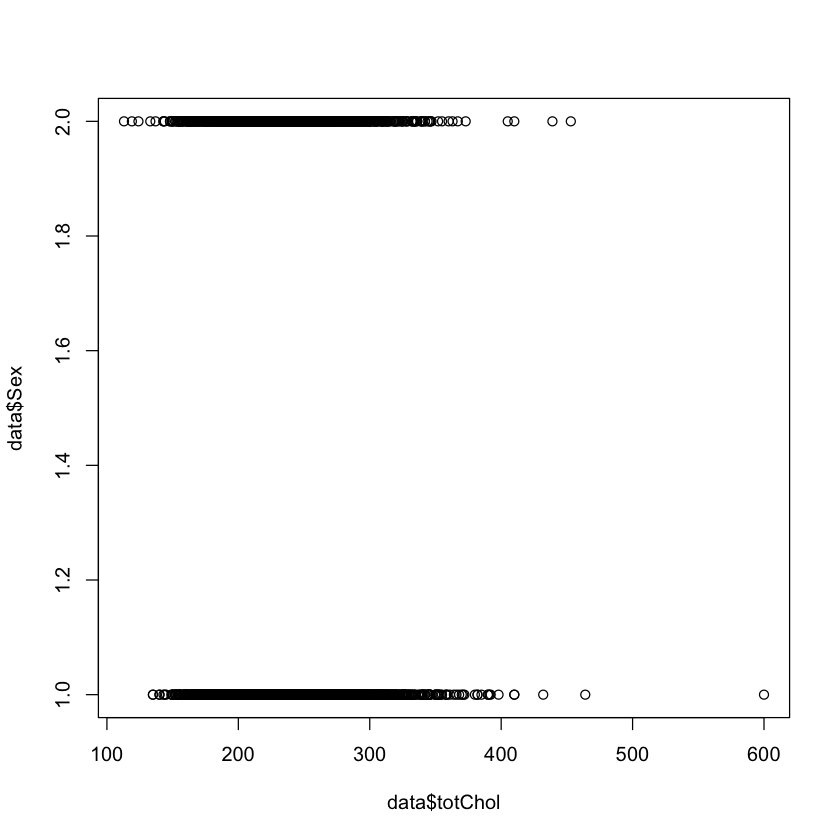

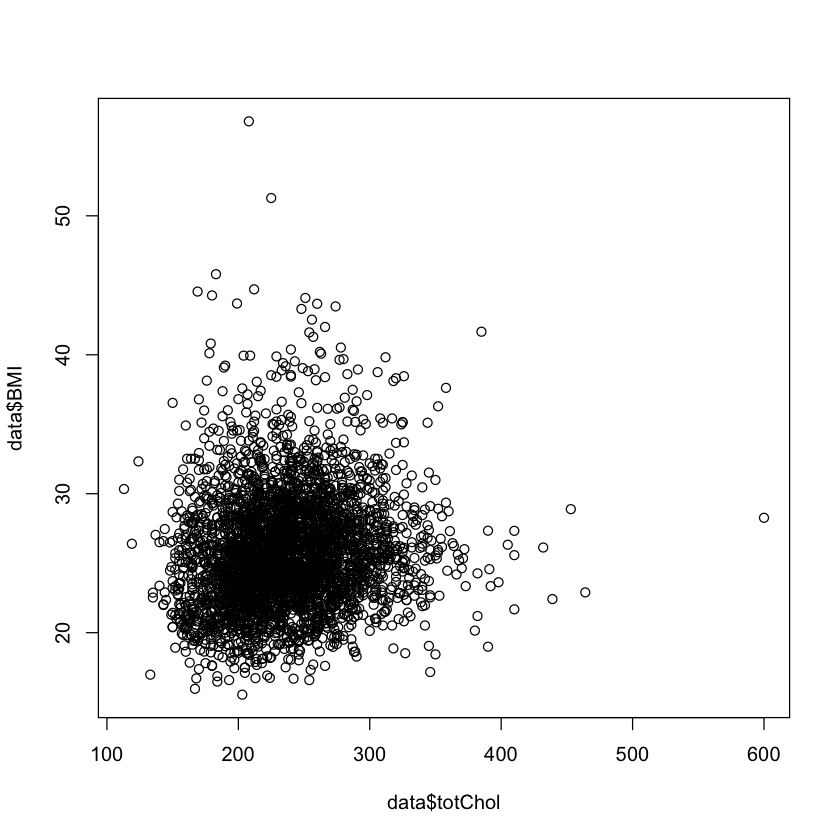

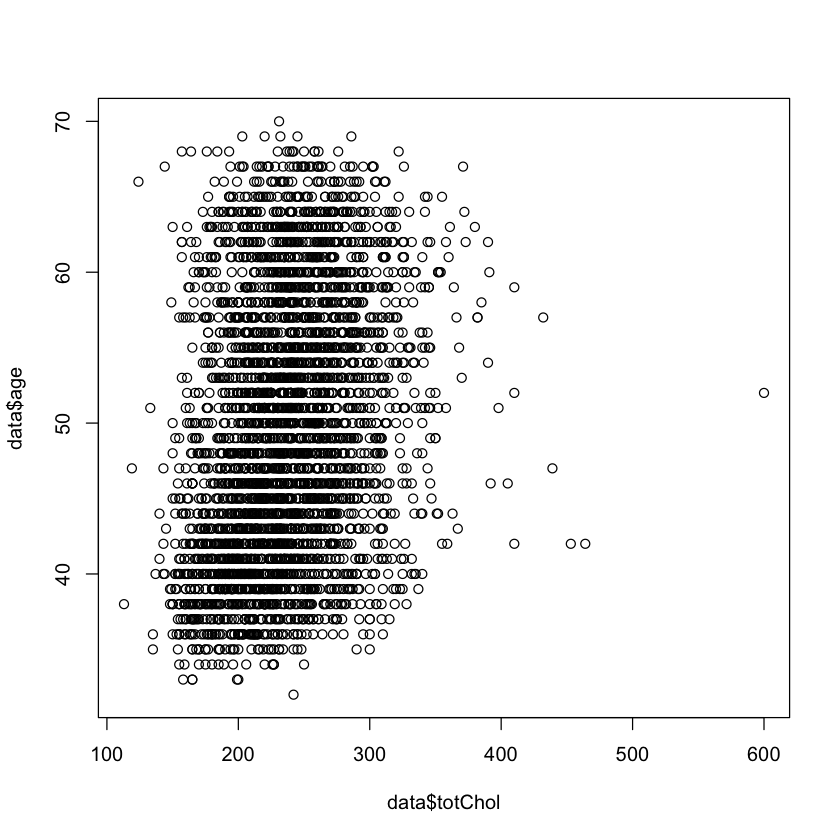

In [8]:
# ad 3
# y muss linear abhängig von den anderen unabhängigen Variablen sein
plot(data$totChol, data$Sex)
plot(data$totChol, data$BMI)
plot(data$totChol, data$age)

### Voraussetzungen für Residuen
(5) Residuen sind normalverteilt mit Erwartungswert 0. Überprüfung: Q-Q-Plots, Histogramm oder Diagramme der Dichtefunktion der Residuen, Hypothesentests (z. B. Shapiro-Wilk-Test) = <span style="color:green">gegeben</span><br>
(6) Residuen haben die gleiche Varianz (Homoskedazität). Überprüfung: Scale-Location-Diagramm oder Hypothesentest (über Breusch-Pagan-Test)
<br/>
(7) Residuen sind nicht untereinander korreliert.<br/>

Wir testen all diese Voraussetzungen mit der Funktion `check_model`

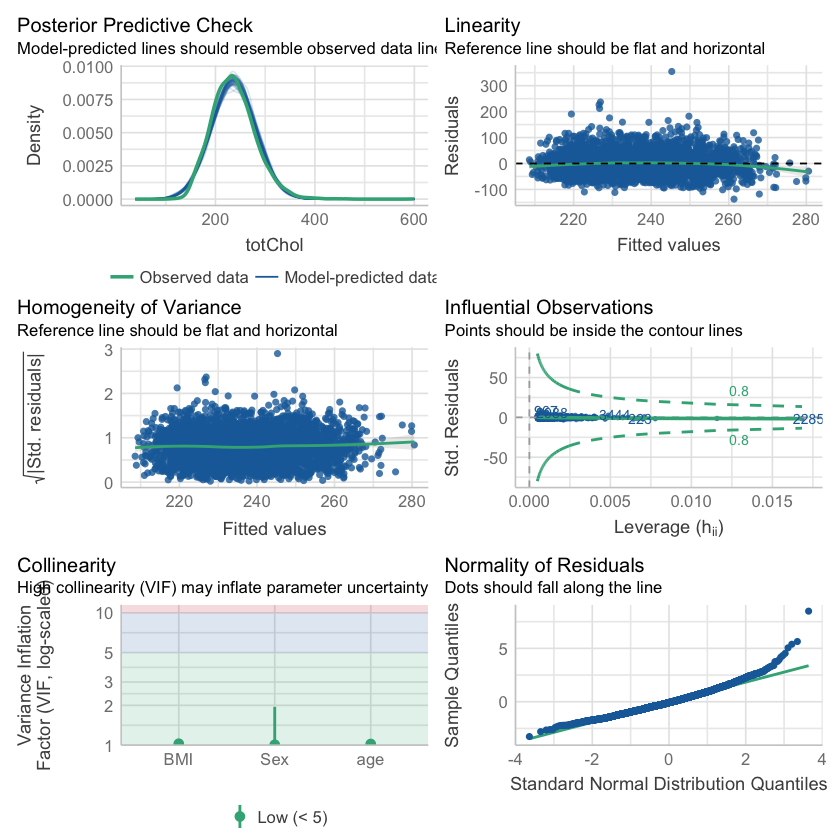

In [9]:
check_model(modell)

##### Interpretation
__Linearität__  
Die Reference Line ist gerade und sehr flach, deswegen kann davon ausgegangen werden, dass dieses Modell eine hohe Linearität aufweist. Es ist jedoch zu beachten, dass die Linearität eines Modells auch durch die Verteilung der Residuals überprüft werden kann. Wenn die Residuals zufällig verteilt sind und keine systematischen Muster aufweisen, ist es wahrscheinlich, dass das Modell linear ist

__Homogenität__  
Der Grafik kann man entnehmen, dass die Werte, wie in der Prüfung vorgegeben, "flat and horizontal" ist. Somit sehen wir das Modell as geeignet an. Siehe auch weiter unten Breusch-Pagan-Test zur statistischen Prüfung.

__Influential Observations__  
Gibt uns an, ob es "Ausreißer" gibt, die einen ungewollten Einfluss auf unser Modell haben könnten. Wie ersichtlich, sind alle Punkte innerhalb des "Trichters", weswegen wir keine Korrekturen vornehmen müssen, um Ausreißer zu entfernen

__Collinearity__  
Gibt an, wie weit sich die Varianz eines geschätzten Regressionskoeffizienten erhäht, wenn alle erklärenden Variablen unabhängig sind. Damit kann der Zusammenhang unter den Variablen selbst getestet werden. Sollte eine oder mehrere Variablen über den Schwellenwert (5) kommen, dann haben diese Einfluss auf mindestens eine andere unabhängige Variable. Im Bild können wir sehen, dass alle Variablen einen VIF von <5 aufweisen, somit kann ausgeschlossen werden, dass sich die unabhängigen Variablen untereinander beeinflussen.

__Normality of Residuals__  
Bei einem Residuenplot sollten die Residuen größtenteils um die Nulllinie verteilt sein. Anhand dieses Residuenplots kann man erkennen, dass beinahe alle Residuals der Nullinie folgen, mit Ausnahme eines Ausreißers und ein paar wenigen Residuen gegen Ende der Nullinie. Eine konstante Varianz der Residuen ist Voraussetzung für gute Schätzungen der Regressionskoeffizienten, damit können mithilfe der Regressionsgerade Prognosen erstellt werden.

#### Prüfung auf Unabhängigkeit: Durbin-Watson-Test
Der Durbin-Watson-Test ist ein statistischer Test, der verwendet wird, um festzustellen, ob es in einer Zeitreihenanalyse Autokorrelationen gibt. Der Test vergleicht die Summe der Quadratischen Abweichungen zwischen den Schätzwerten und den tatsächlichen Werten mit der Summe der Quadratischen Abweichungen zwischen den Schätzwerten und den vorherigen Schätzwerten.

In [16]:
lmtest::dwtest(modell)


	Durbin-Watson test

data:  modell
DW = 2.0121, p-value = 0.6424
alternative hypothesis: true autocorrelation is greater than 0


##### Interpretation
Das Ergebnis des Durbin-Watson-Tests gibt den Wert DW (Durbin-Watson-Statistik) und den p-Wert an. Der Wert DW liegt zwischen 0 und 4, wobei ein Wert von 2 bedeutet, dass keine Autokorrelation vorliegt. Ein Wert, der näher an 0 oder 4 liegt, deutet auf eine positive oder negative Autokorrelation hin.

In diesem Fall hat der Durbin-Watson-Test einen `DW-Wert` von 2.0121 und einen `p-Wert` von 0.6424 ergeben. Da der p-Wert größer als 0.05 ist, kann die Nullhypothese (keine Autokorrelation) _nicht_ verworfen werden.
Das bedeutet, dass es keine signifikante Autokorrelation in den Daten gibt und das Modell somit geeignet ist.

#### Prüfung auf Homoskedastizität: Breusch-Pagan-Test
Der Breusch-Pagan-Test (auch als studentisierter Breusch-Pagan-Test bezeichnet) ist ein statistischer Test, der verwendet wird, um festzustellen, ob es in einer Regressionsanalyse Heteroskedastizität gibt. Heteroskedastizität liegt vor, wenn die Varianz der Fehlerterme der Regressionsgleichung von den unabhängigen Variablen abhängt.

Das Ergebnis des Breusch-Pagan-Tests gibt den Wert BP (Breusch-Pagan-Statistik), die Anzahl der Freiheitsgrade (df) und den p-Wert an. Der p-Wert gibt an, wie wahrscheinlich es ist, dass die Nullhypothese (keine Heteroskedastizität) zufällig erfüllt ist.

In [17]:
lmtest::bptest(modell)


	studentized Breusch-Pagan test

data:  modell
BP = 2.6514, df = 3, p-value = 0.4486


##### Interpretation
In diesem Fall hat der Breusch-Pagan-Test einen `BP-Wert` von 2.6514, 3 Freiheitsgrade und einen `p-Wert` von 0.4486 ergeben. Da der p-Wert größer als 0,05 ist, kann die Nullhypothese (keine Heteroskedastizität) _nicht_ verworfen werden. Das bedeutet, dass es keine signifikante Heteroskedastizität in den Daten gibt und das Modell somit geeignet ist.

## Summary der Regressionsanalyse
Nach der Aufbereitung des Datensatzes haben wir uns mit den verschiedenen Variablen beschäftigt. Die geringe Korrelation zwischen den Variablen hat uns überrascht, da wir von einer hohen Korrelation ausgegangen sind.

Wir haben uns für `totChol` als abhängige und `Sex`, `age`, `BMI` als unabhängige Variablen entschieden, da diese Variablen mitunter die höchsten Korrelationen aufgewiesen haben und somit am besten für unser Modell geeignet sind, wobei wir von einer subjektiven Schätzung der Korrelation zwischen Sex und totChol ausgegangen sind. Unsere subjektive Schätzung hat sich im Zuge der Regressionsanalyse bestätigt.

Bezüglich NA Werten mussten wir uns die Bedeutung dieser fehlenden Werte überlegen. Richard hatte den grandiosen Einfall, dass es sich hierbei um Personen handelt, welche gewisse Fragen nicht beantwortet haben. Diese Werte haben wir aus dem verwendeten Datensatz entfernt.

Die ausschlaggebenden Outputs unserer Regressionsanalyse wird bestimmt durch einem äußerst geringen Bestimmtheitsmaß $R^2$ von 8.4%, jedoch gleichzeitig von einem `p-Wert` von < 2.2e-16. Die einzelnen Variablen zeigen signifikante Werte und leisten somit signifikanten Beitrag zur Erklärung der abhängigen Variable, wobei jedoch die unabhängige Variable Sexmale einen negativen Einfluss auf die abhängige Variable hat.

# Logistische Regression
Die logistische Regression wird verwendet um ein nominalskaliertes, 
kategoriales Kriterium vorherzusagen. Wir benötigen also
eine abhängige Variable die nur ein paar wenige, gleichrangige Ausprägungen 
hat. Das bedeutet dass die abhängige Variable eine binäre oder mehrere kategoriale
Ebenen hat und die unabhängigen Variablen numerisch oder kategorial sind.

Da es sich bei unserer ausgewählten abhängigen Variable um eine numerische Variable
handelt, ist die logistische Regression nicht sinnvoll. Variablen aus
unserem Datensatz welche sichfür die logistische Regression eigenen würden
wären `Sex`, `currentSmoker` und `diabetes`.